In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from data_loader import load_images_and_labels

# Preprocessing and Feature Engineering Data

In [2]:
directory = "caltech-101/101_ObjectCategories"
img_height = 128
img_width = 128

images, labels, class_names = load_images_and_labels(directory, img_height, img_width, 101)

In [3]:
images = images / 255.0 # normalize image color values from 0-255 to 0-1

n_samples = images.shape[0]
print("Number of samples and image shape:", n_samples, images.shape)
data = images.reshape((n_samples, -1))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Number of samples and image shape: 8677 (8677, 128, 128, 3)
Class Names: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner

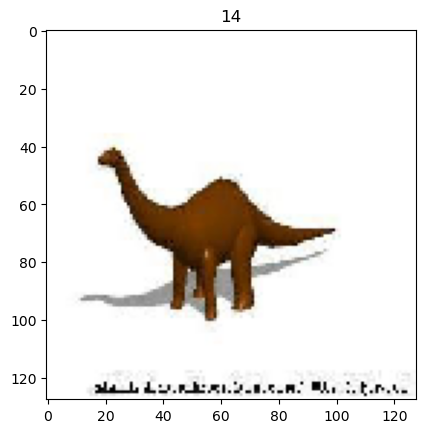

In [4]:
# show a random image
index = random.randint(0, n_samples)
plt.imshow(images[index])
plt.title(labels[index])
plt.show()

# SVC Model

In [5]:
model = Pipeline([ ("svc", SVC(kernel="linear", verbose=1))])

In [6]:
model.fit(x_train, y_train)

[LibSVM].*.*
optimization finished, #iter = 1550
obj = -5.876834, rho = -0.959699
nSV = 199, nBSV = 4
*
optimization finished, #iter = 330
obj = -0.007570, rho = 0.976328
nSV = 87, nBSV = 0
*
optimization finished, #iter = 695
obj = -0.016855, rho = 0.634067
nSV = 115, nBSV = 0
*
optimization finished, #iter = 168
obj = -0.005340, rho = 0.839522
nSV = 47, nBSV = 0
*.*
optimization finished, #iter = 1060
obj = -0.045583, rho = 0.494459
nSV = 152, nBSV = 0
.*.*
optimization finished, #iter = 920
obj = -0.025398, rho = 0.549164
nSV = 119, nBSV = 0
.*.*
optimization finished, #iter = 865
obj = -0.026182, rho = 0.520862
nSV = 116, nBSV = 0
..*.*
optimization finished, #iter = 1264
obj = -0.040987, rho = 0.701636
nSV = 137, nBSV = 0
.*.*
optimization finished, #iter = 905
obj = -0.034268, rho = 1.031893
nSV = 131, nBSV = 0
.*
optimization finished, #iter = 740
obj = -0.024623, rho = 2.063742
nSV = 104, nBSV = 0
*
optimization finished, #iter = 311
obj = -0.009301, rho = 0.002508
nSV = 65, nB

Pipeline(steps=[('svc', SVC(kernel='linear', verbose=1))])

In [7]:
y_pred = model.predict(x_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted labels:", y_pred)
print("True labels:", y_test)
print("Misclassified samples:", (y_test != y_pred).nonzero()[0])

Accuracy: 0.4902073732718894
Predicted labels: [ 5  2  3 ... 79  5 32]
True labels: [ 5  2  3 ... 81  5 64]
Misclassified samples: [   4    6    7   10   11   12   13   17   20   21   26   27   31   33
   35   36   38   39   43   48   50   53   55   56   61   62   64   65
   67   69   70   73   75   76   77   78   79   80   88   91   93   95
   98  100  106  107  109  110  112  113  115  118  123  127  128  133
  134  135  136  138  141  143  144  145  151  152  154  155  156  157
  158  160  162  163  164  166  167  168  169  174  175  177  179  180
  184  185  187  190  191  192  194  196  199  200  202  204  205  210
  213  214  215  216  217  218  221  222  224  226  227  229  232  234
  235  236  237  241  242  243  244  245  246  247  254  257  259  260
  262  268  269  271  272  273  276  278  279  280  284  285  286  288
  289  291  292  294  295  296  298  300  301  304  307  309  310  311
  312  313  314  315  319  323  325  326  327  328  330  333  334  335
  337  339  340  

In [9]:
y_test.shape, y_pred.shape

((1736,), (1736,))

In [10]:
y_test

array([ 5,  2,  3, ..., 81,  5, 64])

In [11]:
y_pred

array([ 5,  2,  3, ..., 79,  5, 32])